In [1]:
# !conda install -c conda-forge xarray dask netCDF4 bottleneck

In [69]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy
from pathlib import Path

import cftime
import numpy as np
import gcsfs
# import proplot as plot 
# import os

# fp = "/Users/jalena/opt/miniconda3/envs/e440/lib/esmf.mk"
# os.environ['ESMFMKFILE'] = fp
# import esmpy as ESMF
# import xesmf as xe

In [70]:
from pathlib import Path
import intake
import xarray as xr

# import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#print(url)
url ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

cat = intake.open_esm_datastore(url)

# Find unique entries:
unique = cat.unique()

In [83]:
# unique.experiment_id

## Clouds 

In [136]:
### Search for specific datasets
cat_subset = cat.search(
    experiment_id=["ssp585"],
    table_id="Amon",
    variable_id="clt",
    grid_label="gn",
    source_id=["CanESM5"],
    # member_id =["r11i1p1f1"]
)

cat_subset.df

activity_id institution_id source_id experiment_id  member_id table_id  \
0   ScenarioMIP          CCCma   CanESM5        ssp585  r17i1p1f1     Amon   
1   ScenarioMIP          CCCma   CanESM5        ssp585  r10i1p1f1     Amon   
2   ScenarioMIP          CCCma   CanESM5        ssp585  r10i1p2f1     Amon   
3   ScenarioMIP          CCCma   CanESM5        ssp585  r11i1p1f1     Amon   
4   ScenarioMIP          CCCma   CanESM5        ssp585  r13i1p1f1     Amon   
5   ScenarioMIP          CCCma   CanESM5        ssp585  r12i1p1f1     Amon   
6   ScenarioMIP          CCCma   CanESM5        ssp585  r12i1p2f1     Amon   
7   ScenarioMIP          CCCma   CanESM5        ssp585   r9i1p1f1     Amon   
8   ScenarioMIP          CCCma   CanESM5        ssp585   r9i1p2f1     Amon   
9   ScenarioMIP          CCCma   CanESM5        ssp585  r21i1p2f1     Amon   
10  ScenarioMIP          CCCma   CanESM5        ssp585  r20i1p2f1     Amon   
11  ScenarioMIP          CCCma   CanESM5        ssp585  r21i1p1f1     Amon   
12  ScenarioMIP          CCCma   CanESM5        ssp585  r15i1p1f1     Amon   
13  ScenarioMIP          CCCma   CanESM5        ssp585  r22i1p1f1     Amon   
14  ScenarioMIP          CCCma   CanESM5        ssp585  r22i1p2f1     Amon   
15  ScenarioMIP          CCCma   CanESM5        ssp585  r17i1p2f1     Amon   
16  ScenarioMIP          CCCma   CanESM5        ssp585  r18i1p2f1     Amon   
17  ScenarioMIP          CCCma   CanESM5        ssp585  r18i1p1f1     Amon   
18  ScenarioMIP          CCCma   CanESM5        ssp585  r16i1p2f1     Amon   
19  ScenarioMIP          CCCma   CanESM5        ssp585  r14i1p1f1     Amon   
20  ScenarioMIP          CCCma   CanESM5        ssp585  r16i1p1f1     Amon   
21  ScenarioMIP          CCCma   CanESM5        ssp585  r15i1p2f1     Amon   
22  ScenarioMIP          CCCma   CanESM5        ssp585  r13i1p2f1     Amon   
23  ScenarioMIP          CCCma   CanESM5        ssp585  r14i1p2f1     Amon   
24  ScenarioMIP          CCCma   CanESM5        ssp585  r11i1p2f1     Amon   
25  ScenarioMIP          CCCma   CanESM5        ssp585  r20i1p1f1     Amon   
26  ScenarioMIP          CCCma   CanESM5        ssp585  r19i1p1f1     Amon   
27  ScenarioMIP          CCCma   CanESM5        ssp585   r1i1p1f1     Amon   
28  ScenarioMIP          CCCma   CanESM5        ssp585  r19i1p2f1     Amon   
29  ScenarioMIP          CCCma   CanESM5        ssp585   r1i1p2f1     Amon   
30  ScenarioMIP          CCCma   CanESM5        ssp585  r25i1p2f1     Amon   
31  ScenarioMIP          CCCma   CanESM5        ssp585  r25i1p1f1     Amon   
32  ScenarioMIP          CCCma   CanESM5        ssp585  r24i1p2f1     Amon   
33  ScenarioMIP          CCCma   CanESM5        ssp585  r24i1p1f1     Amon   
34  ScenarioMIP          CCCma   CanESM5        ssp585  r23i1p1f1     Amon   
35  ScenarioMIP          CCCma   CanESM5        ssp585  r23i1p2f1     Amon   
36  ScenarioMIP          CCCma   CanESM5        ssp585   r6i1p2f1     Amon   
37  ScenarioMIP          CCCma   CanESM5        ssp585   r7i1p1f1     Amon   
38  ScenarioMIP          CCCma   CanESM5        ssp585   r2i1p2f1     Amon   
39  ScenarioMIP          CCCma   CanESM5        ssp585   r2i1p1f1     Amon   
40  ScenarioMIP          CCCma   CanESM5        ssp585   r3i1p2f1     Amon   
41  ScenarioMIP          CCCma   CanESM5        ssp585   r3i1p1f1     Amon   
42  ScenarioMIP          CCCma   CanESM5        ssp585   r4i1p2f1     Amon   
43  ScenarioMIP          CCCma   CanESM5        ssp585   r4i1p1f1     Amon   
44  ScenarioMIP          CCCma   CanESM5        ssp585   r8i1p1f1     Amon   
45  ScenarioMIP          CCCma   CanESM5        ssp585   r8i1p2f1     Amon   
46  ScenarioMIP          CCCma   CanESM5        ssp585   r7i1p2f1     Amon   
47  ScenarioMIP          CCCma   CanESM5        ssp585   r5i1p1f1     Amon   
48  ScenarioMIP          CCCma   CanESM5        ssp585   r5i1p2f1     Amon   
49  ScenarioMIP          CCCma   CanESM5        ssp585   r6i1p1f1     Amon   

   variable_id grid_label

In [96]:
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"
def do_write(dataset,filename,out_folder):
    """
    write a cmip6 data set to the folder ~/repos/e440/tutorials/tutorial_data
    creating the folder if it doesn't already exist.  If the file exits,
    delete it before writing.
    """
    full_path = out_folder / filename
    if full_path.exists():
        full_path.unlink()
    out_folder.mkdir(parents=True,exist_ok=True)
    dataset.load().to_netcdf(full_path,'w')
    return full_path

filename = "arctic_dset_clt__ssp585.nc"
full_path = out_folder / filename
var_key = "ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn"

In [97]:
#
# if write_file is true this will download and write the file to tutorial_data
#
write_file = True
if write_file:
    can_subset = cat_subset.search(table_id="Amon", variable_id = "clt", source_id = "CanESM5", experiment_id = 'ssp585')
    dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    can_dset = dset_dict[var_key]
    can_bc_dset = can_dset.sel(lat = slice(66.33, 90), time = slice('2015', '2025'))
    full_path = do_write(can_bc_dset,filename,out_folder)
    print(f"got here, writing {full_path=}")
#
# read the netcdffile
#
arctic_ssp_clt = xr.open_dataset(full_path)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


got here, writing full_path=PosixPath('/Users/jalena/repos/e440/A448/data/arctic_dset_clt__ssp585.nc')


In [99]:
can_dset

<xarray.Dataset>
Dimensions:         (lat: 64, lon: 128, time: 3432, dcpp_init_year: 1,
                     member_id: 50, bnds: 2)
Coordinates:
  * lat             (lat) float64 -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon             (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * time            (time) object 2015-01-16 12:00:00 ... 2300-12-16 12:00:00
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * member_id       (member_id) object 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
    lon_bnds        (lon, bnds) float64 -1.406 1.406 1.406 ... 355.8 355.8 358.6
    time_bnds       (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 516, 64, 128), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn

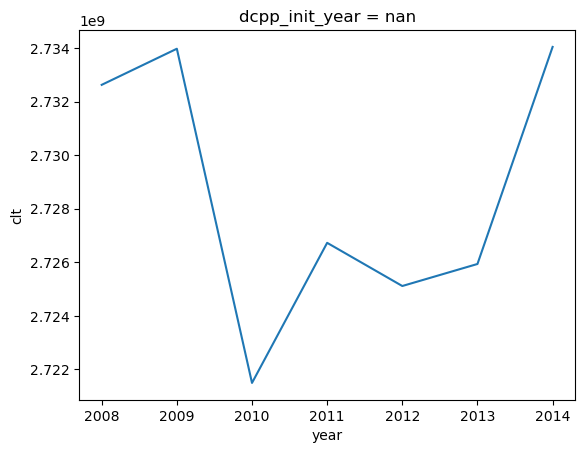

In [7]:
mean_precip = can_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip.mean('member_id').clt.plot()
# plt.title("Averaged Yearly precipitation for the CanESM5 GCM")
# plt.xlabel('Year')
# plt.ylabel('Precipitation total (mm)')
# can_bc_dset

In [5]:
# data2010 = can_bc_dset.sel(time='2014')
# precip_data2010 = data2010.groupby('time.year').mean('time')*86400*365
# # precip_data2010 = precip_data2010.mean('member_id')

# fig = plt.figure(1, figsize=[30,13])

# ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.coastlines()
# ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
# ax.set_extent([-20, 20, 50, 90])

# resol = '50m'

# provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
#     name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
# ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



# precip_data2010.clt.plot(ax=ax,cmap='coolwarm')
# ax.title.set_text("Precipitation total for 2010")

In [6]:
ds = dset_dict["CMIP.CCCma.CanESM5.historical.Amon.gn"]
ds

NameError: name 'dset_dict' is not defined

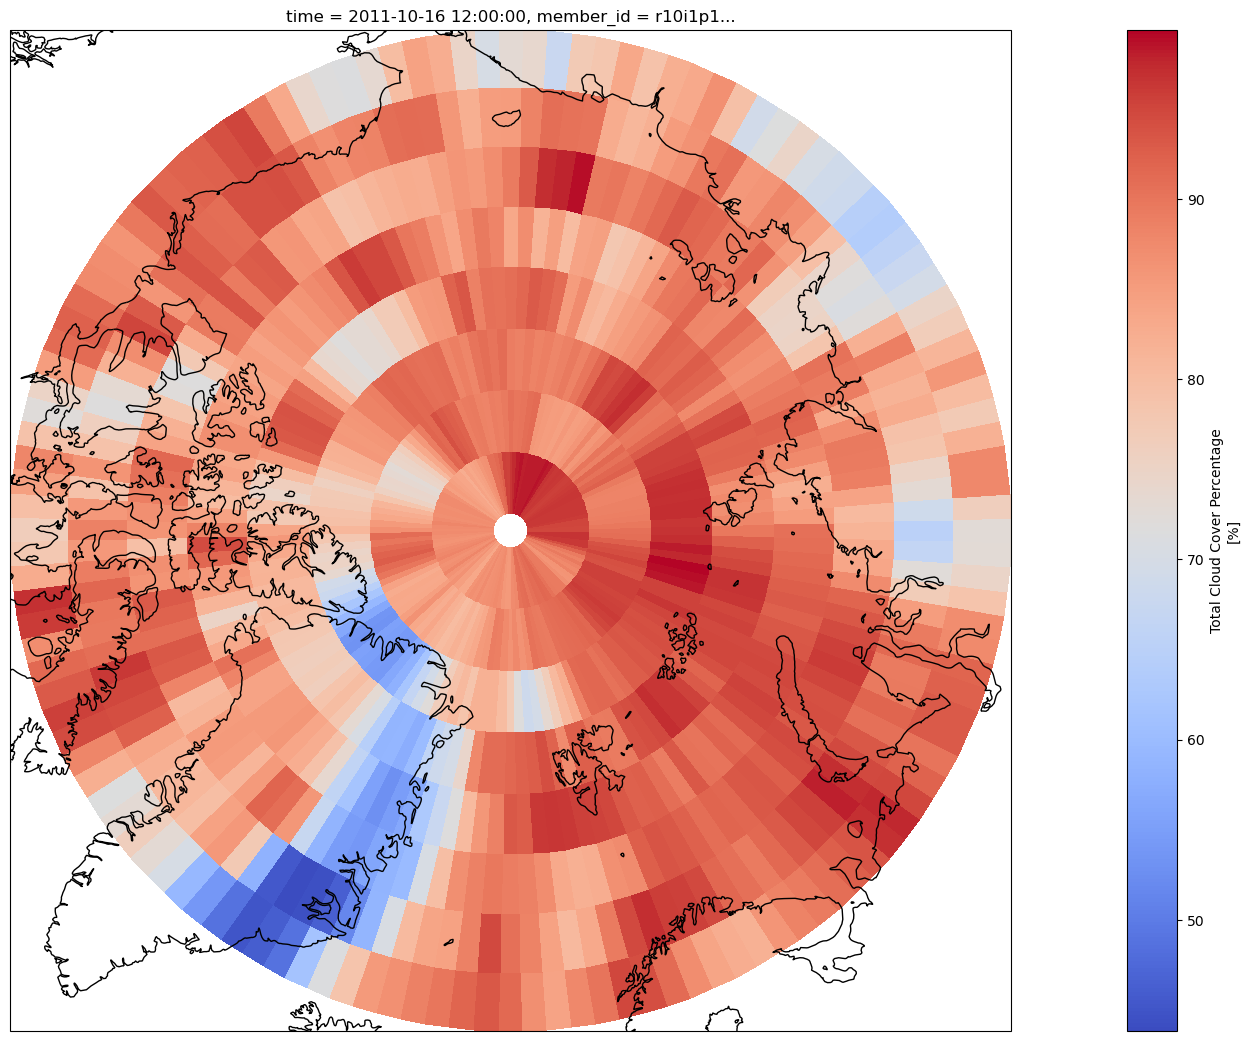

In [9]:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test = ds.sel(lat = slice(66.33, 90), time = slice('2011-10', '2018'))
ds_test.clt.isel(time=0, member_id=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm');

useful links (march 10-14):
- https://nordicesmhub.github.io/Norway_Sweden_training/pangeo/CMIP6_example.html

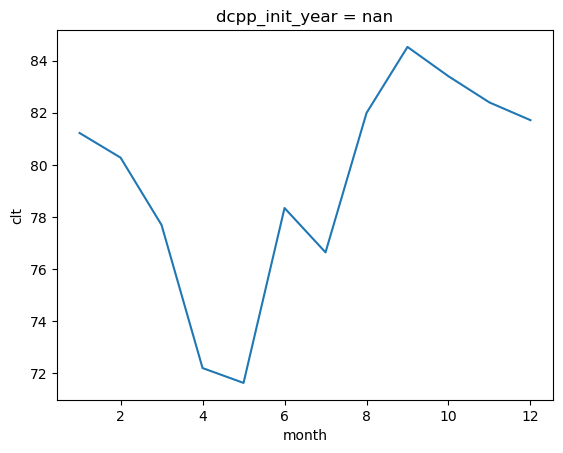

In [10]:
ds_test = ds.sel(lat = slice(66.33, 90), time = slice('2011-10', '2018')).groupby('time.month').mean('time').mean(['lon', 'lat'])
ds_test.mean('member_id').clt.plot()

In [ ]:
# mean_precip = can_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365

## Sea ice

In [119]:
## How to find different variable names for ice!! 
# -> will all have table_id = "SImon", and then can find unique entries.
# cat_subset_ice = cat.search(
#     # experiment_id=["historical"],
#     table_id="SImon",
#     # variable_id="si",
#     grid_label="gn",
#     # source_id=["CanESM5"],
#     # member_id =["r11i1p1f1"]
# )

# cat_subset_ice.df
# cat_subset_ice.unique()['variable_id']

### Search for specific datasets
cat_subset = cat.search(
    experiment_id=["historical"],
    table_id="SImon",
    variable_id="siconc",
    grid_label="gn",
    source_id=["CanESM5"],
    # member_id =["r11i1p1f1"]
)

cat_subset.df

activity_id institution_id source_id experiment_id  member_id table_id  \
0         CMIP          CCCma   CanESM5    historical  r11i1p1f1    SImon   
1         CMIP          CCCma   CanESM5    historical  r13i1p1f1    SImon   
2         CMIP          CCCma   CanESM5    historical  r13i1p2f1    SImon   
3         CMIP          CCCma   CanESM5    historical  r10i1p1f1    SImon   
4         CMIP          CCCma   CanESM5    historical  r10i1p2f1    SImon   
..         ...            ...       ...           ...        ...      ...   
60        CMIP          CCCma   CanESM5    historical  r17i1p1f1    SImon   
61        CMIP          CCCma   CanESM5    historical  r31i1p2f1    SImon   
62        CMIP          CCCma   CanESM5    historical  r34i1p2f1    SImon   
63        CMIP          CCCma   CanESM5    historical  r32i1p2f1    SImon   
64        CMIP          CCCma   CanESM5    historical   r6i1p2f1    SImon   

   variable_id grid_label                                             zstore  \
0       siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
1       siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
2       siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
3       siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
4       siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
..         ...        ...                                                ...   
60      siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
61      siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
62      siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
63      siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   
64      siconc         gn  gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...   

    dcpp_init_year   version  
0              NaN  20190429  
1              NaN  20190429  
2              NaN  20190429  
3              NaN  20190429  
4              NaN  20190429  
..             ...       ...  
60             NaN  20190429  
61             NaN  20190429  
62             NaN  20190429  
63             NaN  20190429  
64             NaN  20190429  

[65 rows x 11 columns]

In [120]:
cat_subset.df['zstore'][1]

'gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical/r13i1p1f1/SImon/siconc/gn/v20190429/'

In [117]:
# write_file = True
# if write_file:
#     can_subset = cat_subset.search(table_id="Amon", variable_id = "clt", source_id = "CanESM5", experiment_id = 'historical')
#     dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
filename = "arctic_dset_ice.nc"
full_path = out_folder / filename
var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"

write_file = False
if write_file:
    can_subset = cat_subset.search(table_id="SImon", variable_id = "siconc", source_id = "CanESM5", experiment_id = 'historical')
    dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    ice_dset = dset_dict[var_key]
    arctic_ice_dset = ice_dset.sel(time = slice('2004', '2015'))
    full_path = do_write(arctic_ice_dset,filename,out_folder)
    print(f"got here, writing {full_path=}")
#
# read the netcdffile
#
arctic_ice_dset = xr.open_dataset(full_path)

In [118]:
arctic_ice_dset

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, member_id: 65, dcpp_init_year: 1,
                         time: 132, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
  * time                (time) object 2004-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object ...
    type                |S7 ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
  * member_id           (member_id) object 'r10i1p1f1' ... 'r9i1p2f1'
  * dcpp_init_year      (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds, vertices
Data variables:
    siconc              (member_id, dcpp_init_year, time, j, i) float32 ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        SImon
    intake_esm_attrs:variable_id:     siconc
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.SImon.gn

In [3]:
# ds_ice = dset_dict["CMIP.CCCma.CanESM5.historical.SImon.gn"]
# ds_ice
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"

filename = "can_arctic_dset_clt.nc"
full_path = out_folder / filename
var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
arctic_ice_dset = xr.open_dataset(full_path)
arctic_ice_dset

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

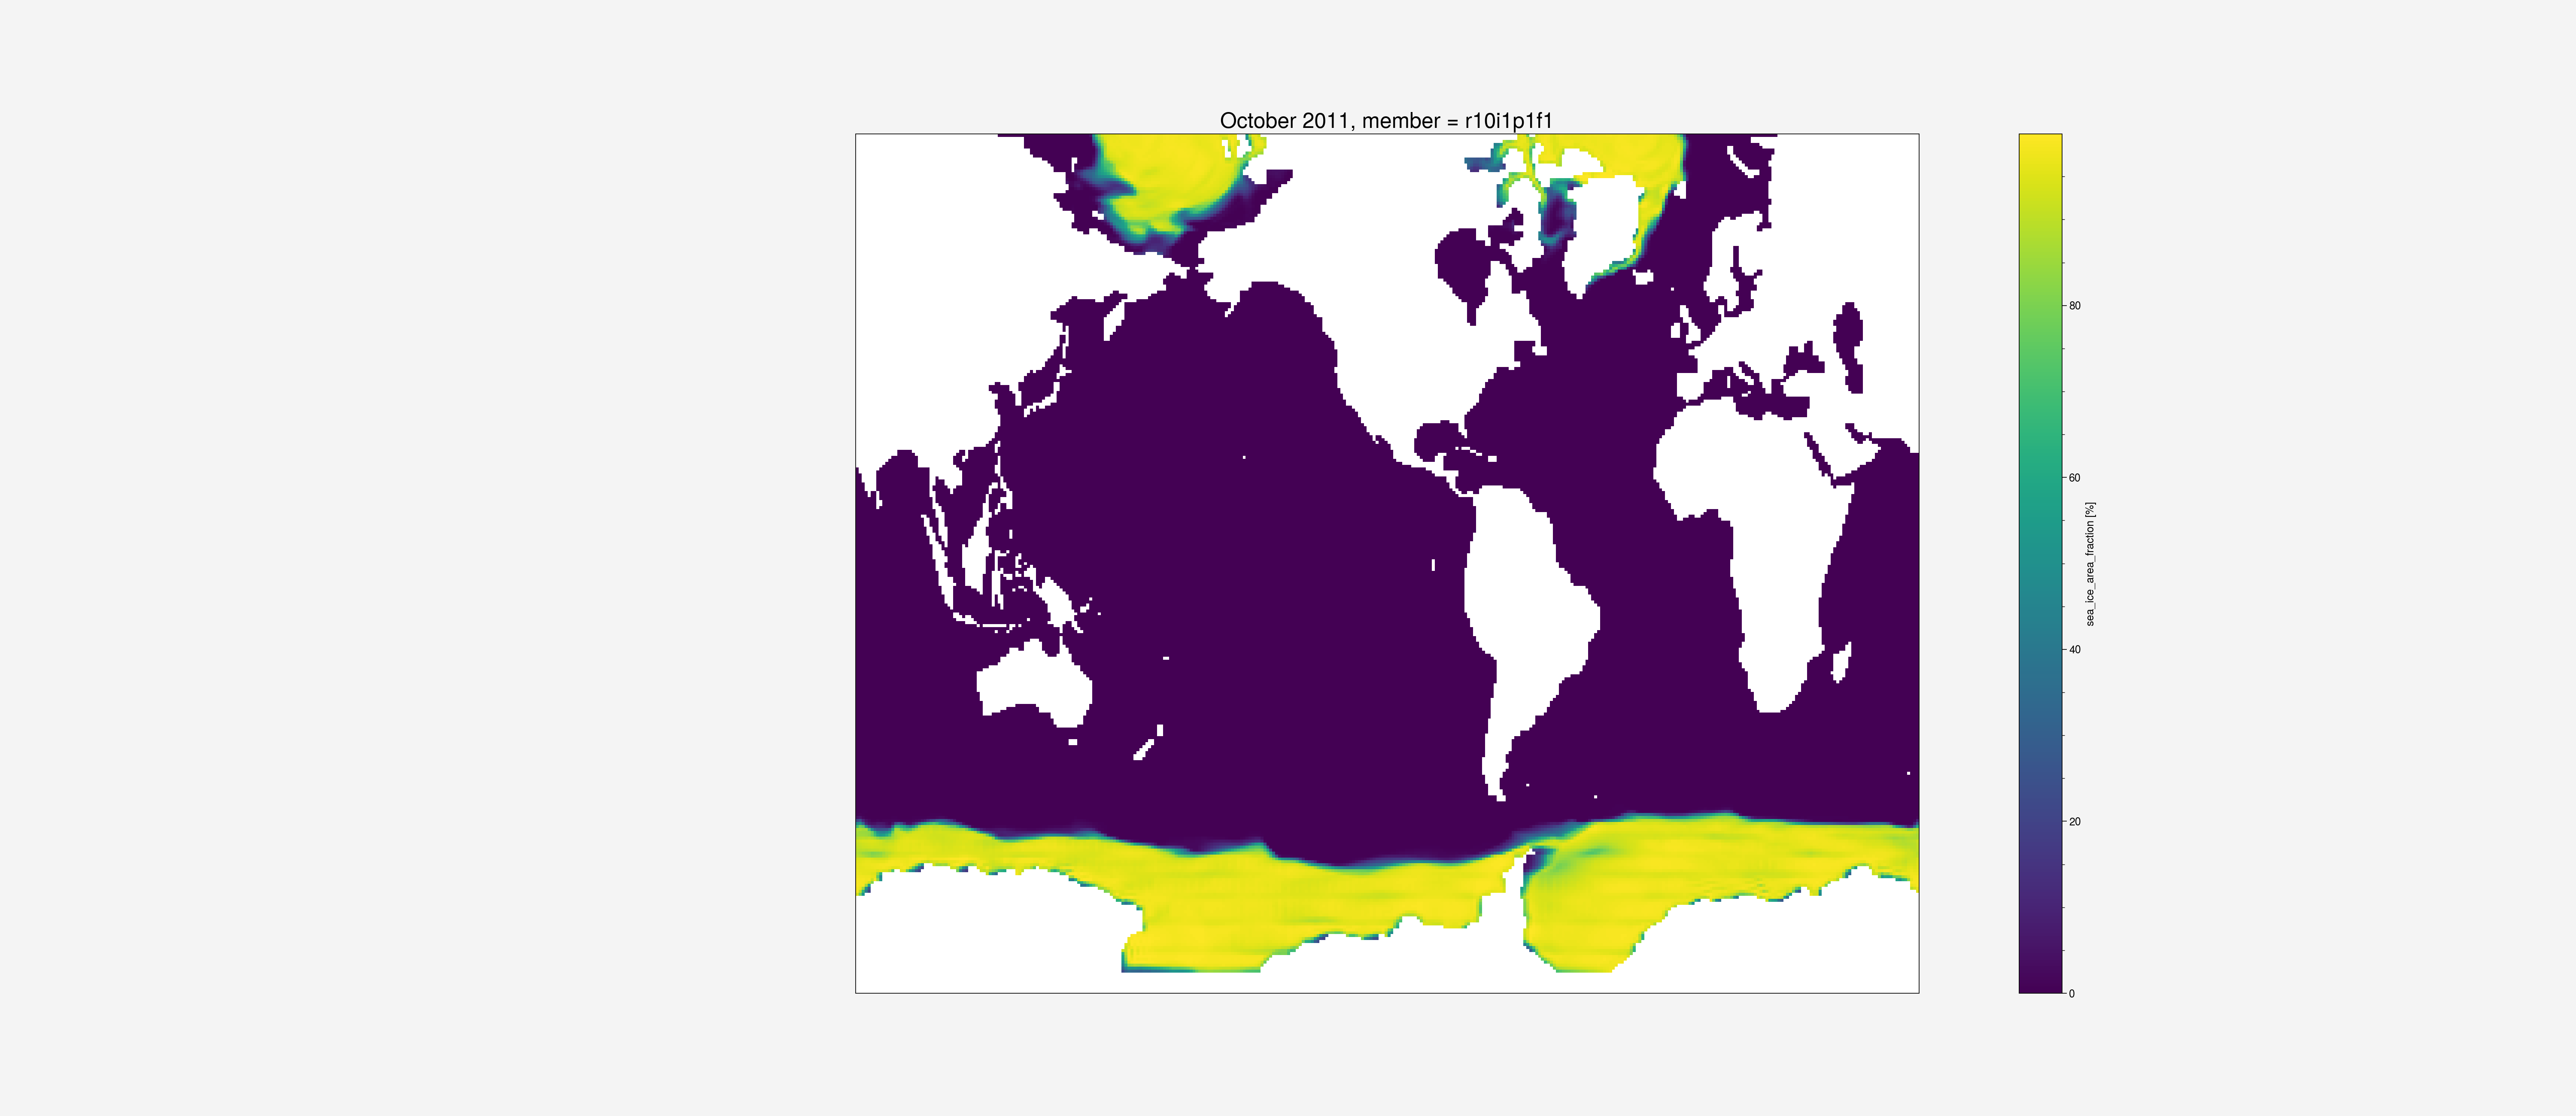

In [8]:
# ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
# ax.coastlines()
# # ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
# ds_test = ds_ice.sel(time = slice('2011-10', '2018'))
# ds_test.siconc.isel(time=0, member_id=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm');

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test = ds_ice.sel(time = slice('2011-10', '2018'))
ds_test.siconc.isel(time=0, member_id=0).plot()
plt.title(f'{ds_test.time.values[0].strftime("%B %Y")}, member = {ds_test.member_id.values[0]}', fontsize=18);

In [121]:
### Problem above: coordinates are in a curvilinear grid!! >:( ;-;

### Solution: use mutable-mapping as seen in 
#https://github.com/pangeo-data/pangeo-cmip6-examples/blob/master/basic_search_and_load.ipynb

gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = cat_subset.df['zstore'][1]

# Mutable-mapping interface for this zstore:
mapper = gcs.get_mapper(zstore)

# open her up:
ds_ice_m = xr.open_zarr(mapper, consolidated=True)
ds_ice_m

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type                |S7 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    siconc              (time, j, i) float32 dask.array<chunksize=(700, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            7e8e715f3f2ce47e1bab830db971c362ca329419
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his13
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/dfa0ca7e-a8ae-4228-be54-e908db7...
    variable_id:                 siconc
    variant_label:               r13i1p1f1
    version:                     v20190429
    version_id:                  v20190429

/Users/jalena/opt/miniconda3/envs/e440/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)


Text(0.5, 1.0, 'Historical Sea Ice Concentration (%)\non 1850-10-16 12:00:00')

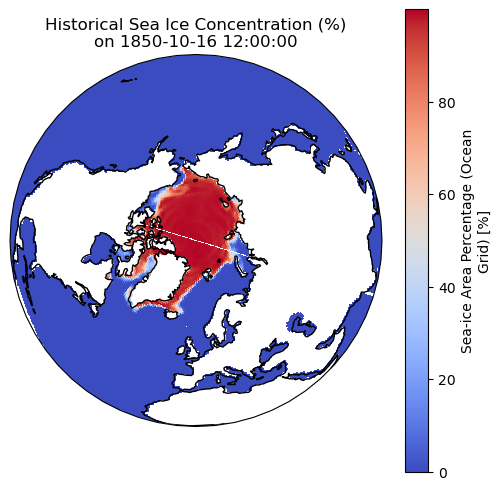

In [135]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ax.set_global()
ds_ice_m.siconc.isel(time=9).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True, cmap='coolwarm')
plt.title(f"Historical Sea Ice Concentration (%)\non {ds_ice_m.time.values[9]}")

In [16]:
# ds_ice_m.siconc.isel(time=-1).plot(x='longitude', y='latitude')

/Users/jalena/opt/miniconda3/envs/e440/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)


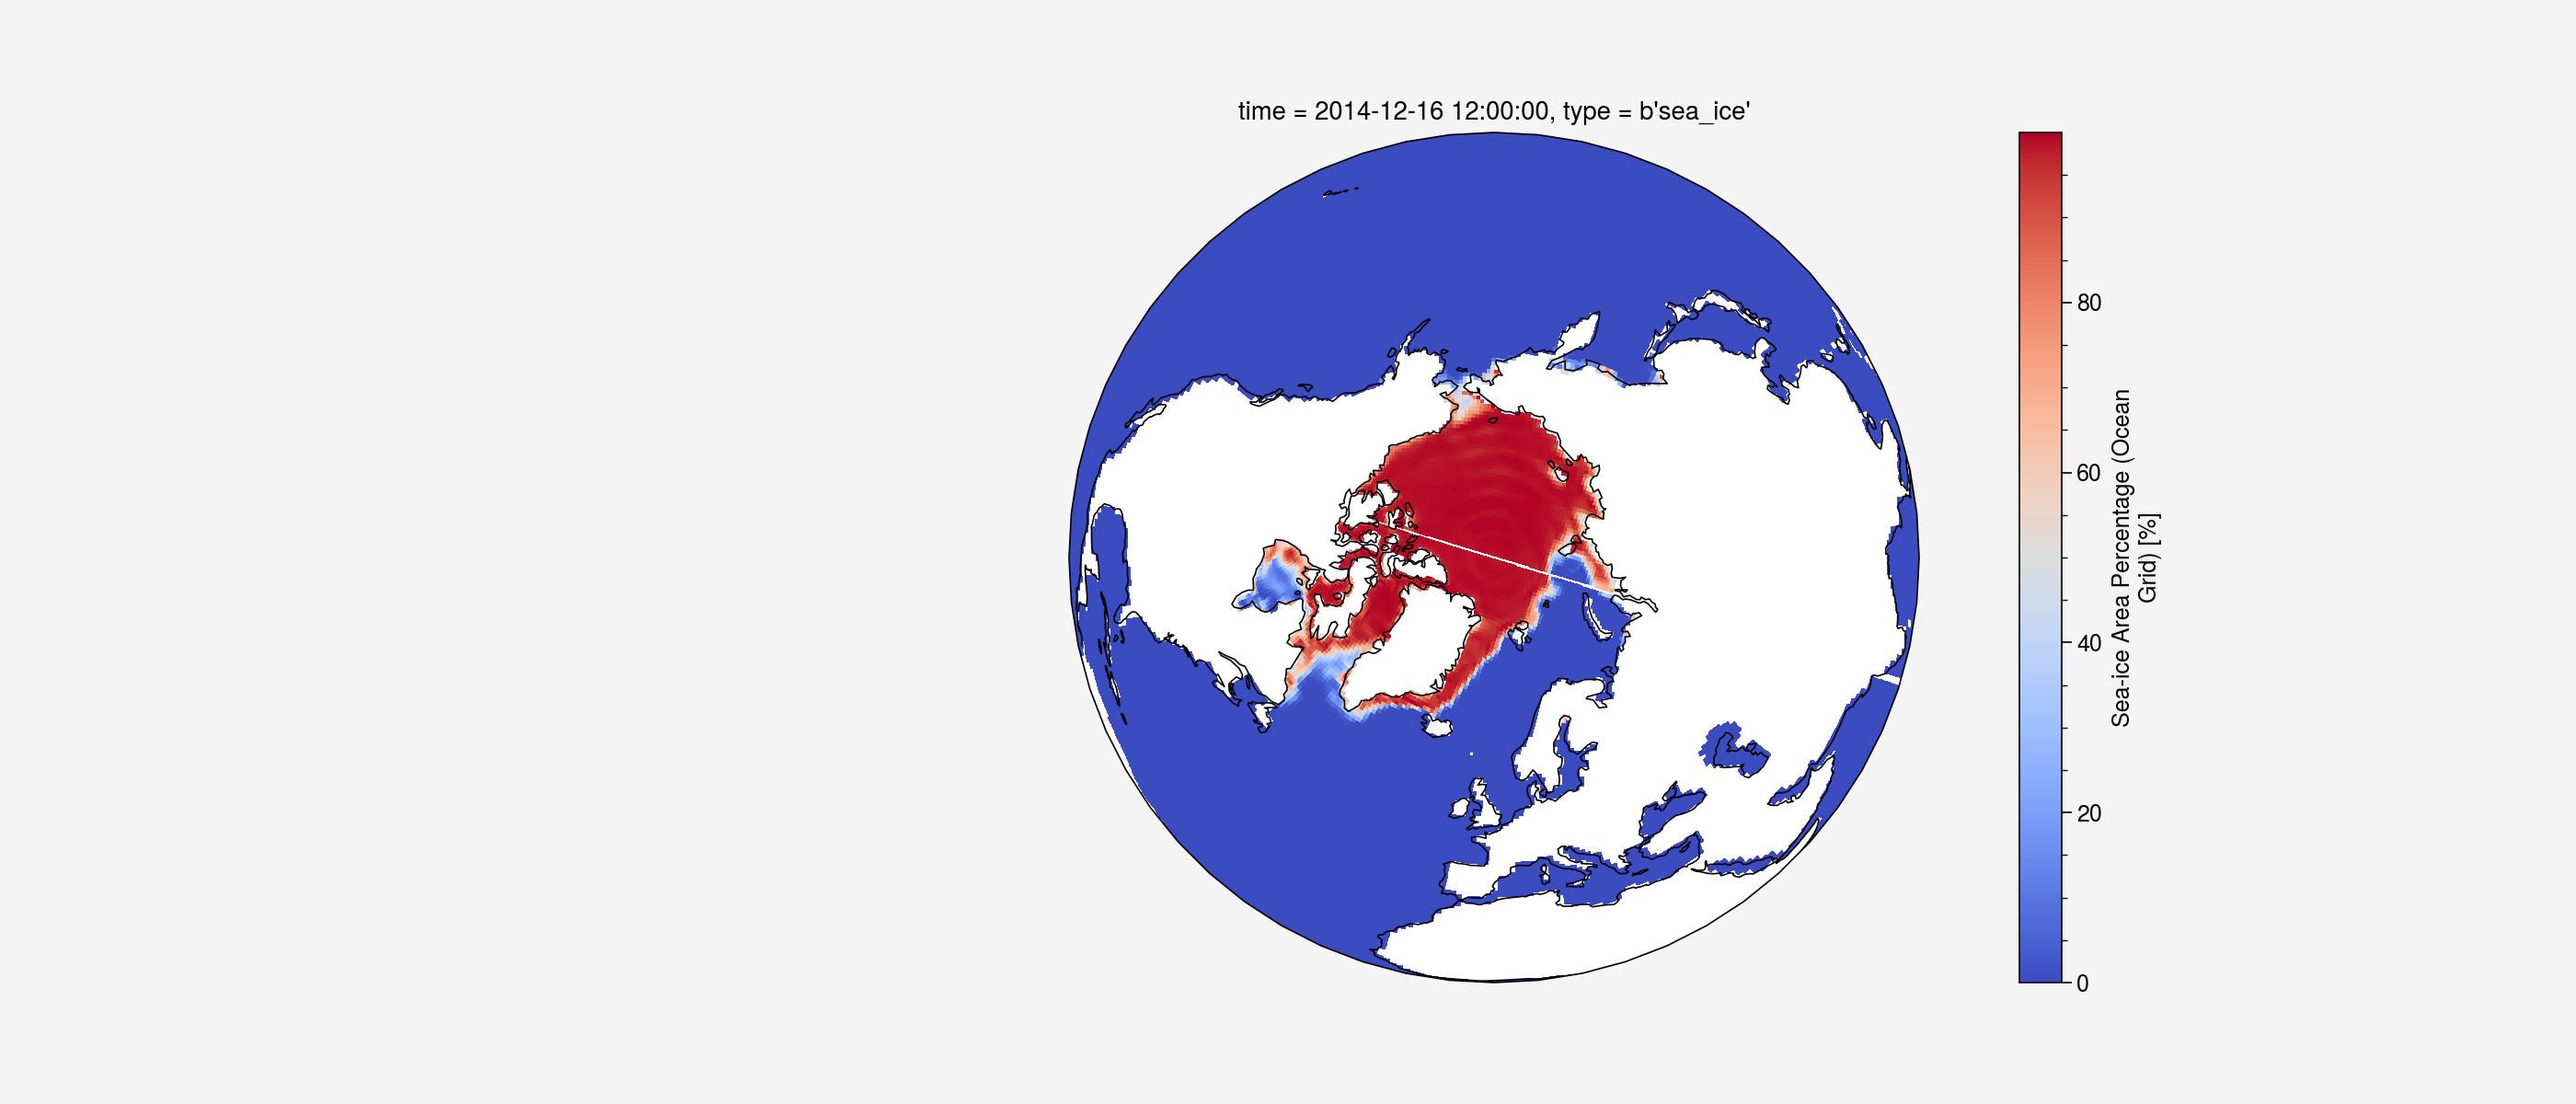

In [116]:
plt.figure(figsize=(14,6))
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ax.set_global()
ds_ice_m.siconc.isel(time=-1).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True, cmap='coolwarm')


AttributeError: 'Dataset' object has no attribute 'siconc'

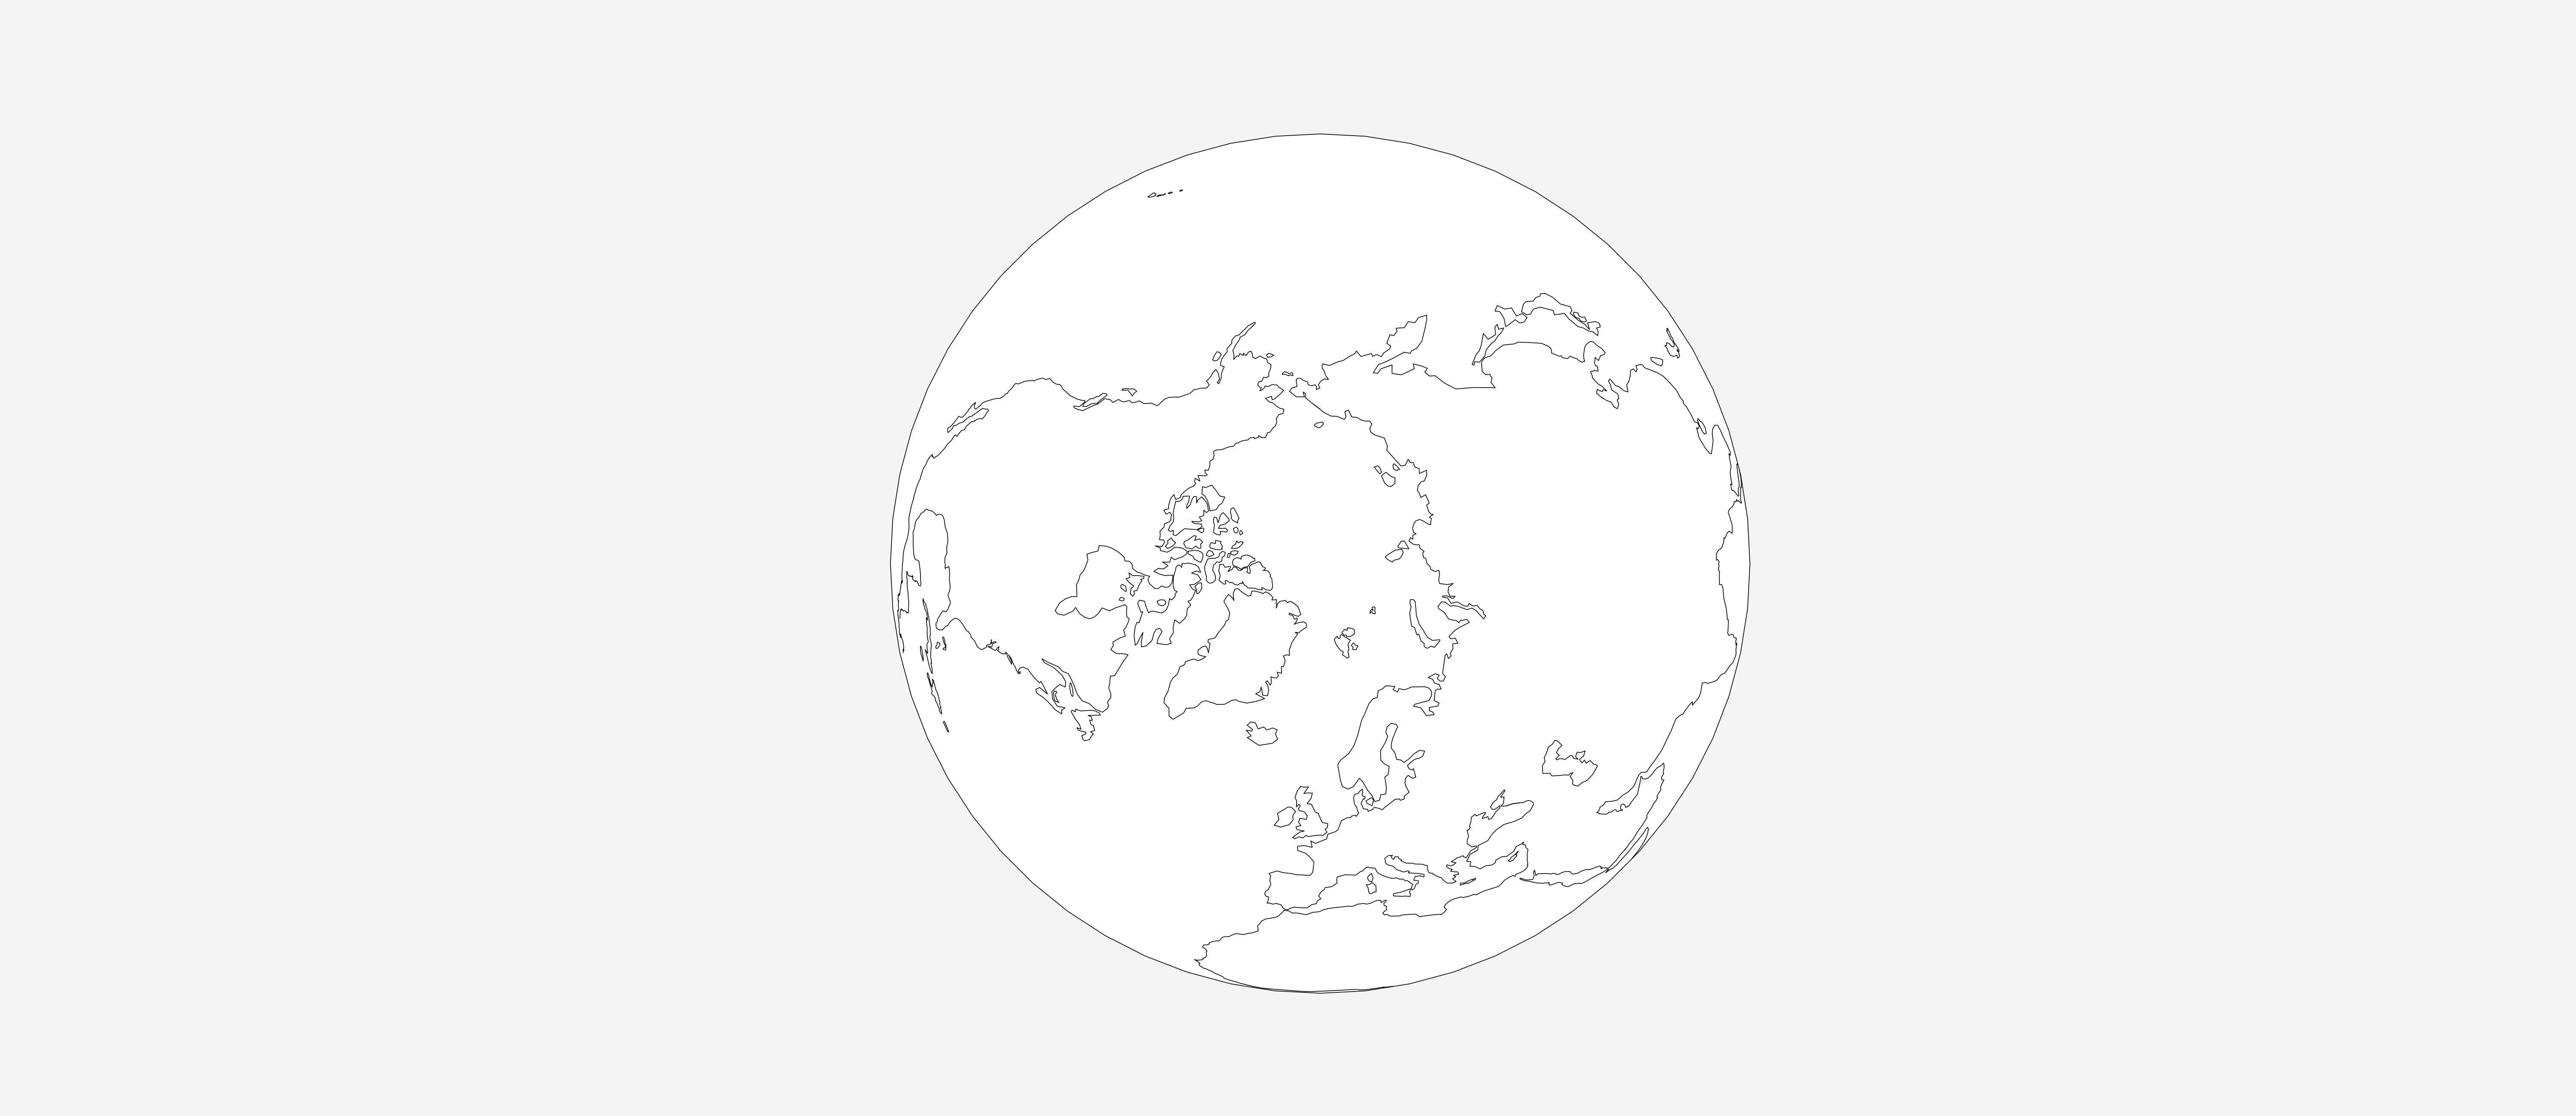

In [178]:
plt.figure(figsize=[30,13])
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ax.set_global()
ice_test = ds_ice_m.sel(time = slice('2011-10', '2018'))
ds_ice_m.siconc.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True, cmap='coolwarm');
plt.title(f'{ds_test.time.values[0].strftime("%B %Y")}', fontsize=18)
# plt.ylim(ds_ice_m['latitude'][1,1]);
# ds.sel(lat = slice(66.33, 90), time = slice('2011-10', '2018'))

## How to slice for latitude???? AHHH!!!

## LOW clouds only

In [112]:
### Search for specific datasets
cat_subset_cl = cat.search(
    experiment_id=["ssp585"],
    table_id="Amon",
    variable_id="cl",
    grid_label="gn",
    source_id=["CanESM5"],
    # member_id =["r11i1p1f1"]
)

cat_subset_cl.df

activity_id institution_id source_id experiment_id  member_id table_id  \
0   ScenarioMIP          CCCma   CanESM5        ssp585  r17i1p1f1     Amon   
1   ScenarioMIP          CCCma   CanESM5        ssp585  r10i1p1f1     Amon   
2   ScenarioMIP          CCCma   CanESM5        ssp585  r10i1p2f1     Amon   
3   ScenarioMIP          CCCma   CanESM5        ssp585  r13i1p1f1     Amon   
4   ScenarioMIP          CCCma   CanESM5        ssp585  r11i1p1f1     Amon   
5   ScenarioMIP          CCCma   CanESM5        ssp585  r12i1p1f1     Amon   
6   ScenarioMIP          CCCma   CanESM5        ssp585  r12i1p2f1     Amon   
7   ScenarioMIP          CCCma   CanESM5        ssp585   r9i1p1f1     Amon   
8   ScenarioMIP          CCCma   CanESM5        ssp585   r9i1p2f1     Amon   
9   ScenarioMIP          CCCma   CanESM5        ssp585  r21i1p1f1     Amon   
10  ScenarioMIP          CCCma   CanESM5        ssp585  r21i1p2f1     Amon   
11  ScenarioMIP          CCCma   CanESM5        ssp585  r20i1p2f1     Amon   
12  ScenarioMIP          CCCma   CanESM5        ssp585  r15i1p1f1     Amon   
13  ScenarioMIP          CCCma   CanESM5        ssp585  r22i1p1f1     Amon   
14  ScenarioMIP          CCCma   CanESM5        ssp585  r22i1p2f1     Amon   
15  ScenarioMIP          CCCma   CanESM5        ssp585  r17i1p2f1     Amon   
16  ScenarioMIP          CCCma   CanESM5        ssp585  r18i1p1f1     Amon   
17  ScenarioMIP          CCCma   CanESM5        ssp585  r16i1p2f1     Amon   
18  ScenarioMIP          CCCma   CanESM5        ssp585  r18i1p2f1     Amon   
19  ScenarioMIP          CCCma   CanESM5        ssp585  r14i1p1f1     Amon   
20  ScenarioMIP          CCCma   CanESM5        ssp585  r16i1p1f1     Amon   
21  ScenarioMIP          CCCma   CanESM5        ssp585  r15i1p2f1     Amon   
22  ScenarioMIP          CCCma   CanESM5        ssp585  r13i1p2f1     Amon   
23  ScenarioMIP          CCCma   CanESM5        ssp585  r14i1p2f1     Amon   
24  ScenarioMIP          CCCma   CanESM5        ssp585  r11i1p2f1     Amon   
25  ScenarioMIP          CCCma   CanESM5        ssp585  r20i1p1f1     Amon   
26  ScenarioMIP          CCCma   CanESM5        ssp585   r1i1p1f1     Amon   
27  ScenarioMIP          CCCma   CanESM5        ssp585  r19i1p1f1     Amon   
28  ScenarioMIP          CCCma   CanESM5        ssp585  r19i1p2f1     Amon   
29  ScenarioMIP          CCCma   CanESM5        ssp585   r1i1p2f1     Amon   
30  ScenarioMIP          CCCma   CanESM5        ssp585  r25i1p2f1     Amon   
31  ScenarioMIP          CCCma   CanESM5        ssp585  r25i1p1f1     Amon   
32  ScenarioMIP          CCCma   CanESM5        ssp585  r24i1p2f1     Amon   
33  ScenarioMIP          CCCma   CanESM5        ssp585  r24i1p1f1     Amon   
34  ScenarioMIP          CCCma   CanESM5        ssp585  r23i1p1f1     Amon   
35  ScenarioMIP          CCCma   CanESM5        ssp585  r23i1p2f1     Amon   
36  ScenarioMIP          CCCma   CanESM5        ssp585   r6i1p2f1     Amon   
37  ScenarioMIP          CCCma   CanESM5        ssp585   r7i1p1f1     Amon   
38  ScenarioMIP          CCCma   CanESM5        ssp585   r2i1p1f1     Amon   
39  ScenarioMIP          CCCma   CanESM5        ssp585   r2i1p2f1     Amon   
40  ScenarioMIP          CCCma   CanESM5        ssp585   r3i1p2f1     Amon   
41  ScenarioMIP          CCCma   CanESM5        ssp585   r3i1p1f1     Amon   
42  ScenarioMIP          CCCma   CanESM5        ssp585   r4i1p2f1     Amon   
43  ScenarioMIP          CCCma   CanESM5        ssp585   r8i1p1f1     Amon   
44  ScenarioMIP          CCCma   CanESM5        ssp585   r8i1p2f1     Amon   
45  ScenarioMIP          CCCma   CanESM5        ssp585   r7i1p2f1     Amon   
46  ScenarioMIP          CCCma   CanESM5        ssp585   r4i1p1f1     Amon   
47  ScenarioMIP          CCCma   CanESM5        ssp585   r5i1p2f1     Amon   
48  ScenarioMIP          CCCma   CanESM5        ssp585   r5i1p1f1     Amon   
49  ScenarioMIP          CCCma   CanESM5        ssp585   r6i1p1f1     Amon   

   variable_id grid_label

In [114]:
filename = "arctic_dset_cl_ssp585.nc"
full_path = out_folder / filename
var_key = "ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn"

In [115]:
write_file = True
if write_file:
    can_subset_cl = cat_subset_cl.search(table_id="Amon", variable_id = "cl", source_id = "CanESM5", experiment_id = 'ssp585')
    dset_dict_cl = can_subset_cl.to_dataset_dict(zarr_kwargs={'consolidated':True})
    cl_dset = dset_dict_cl[var_key]
    arctic_cl_dset = cl_dset.sel(lat = slice(66.33, 90), time = slice('2015', '2025'))
    full_path = do_write(arctic_cl_dset,filename,out_folder)
    print(f"got here, writing {full_path=}")


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


got here, writing full_path=PosixPath('/Users/jalena/repos/e440/A448/data/arctic_dset_cl_ssp585.nc')


In [107]:
arctic_cl = xr.open_dataset(full_path)
arctic_cl

<xarray.Dataset>
Dimensions:         (lev: 49, bnds: 2, member_id: 64, dcpp_init_year: 1,
                     time: 132, lat: 8, lon: 128)
Coordinates: (12/15)
    ap              (lev) float64 ...
    ap_bnds         (lev, bnds) float64 ...
    b               (lev) float64 ...
    b_bnds          (lev, bnds) float64 ...
  * lat             (lat) float64 68.37 71.16 73.95 76.74 79.53 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 ...
    ...              ...
    lon_bnds        (lon, bnds) float64 ...
    ps              (member_id, time, lat, lon) float32 ...
  * time            (time) object 2004-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds       (time, bnds) object ...
  * member_id       (member_id) object 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    cl              (member_id, dcpp_init_year, time, lev, lat, lon) float32 ...
Attributes: (12/52)
    CCCma_pycmor_hash:                e9be30792f709197b37c5ec60e475d684fab8390
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     cl
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

In [183]:
ds_cl = dset_dict_cl["CMIP.CCCma.CanESM5.historical.Amon.gn"]
ds_cl

<xarray.Dataset>
Dimensions:         (lev: 49, bnds: 2, member_id: 64, dcpp_init_year: 1,
                     time: 1980, lat: 64, lon: 128)
Coordinates: (12/15)
    ap              (lev) float64 dask.array<chunksize=(49,), meta=np.ndarray>
    ap_bnds         (lev, bnds) float64 dask.array<chunksize=(49, 2), meta=np.ndarray>
    b               (lev) float64 dask.array<chunksize=(49,), meta=np.ndarray>
    b_bnds          (lev, bnds) float64 dask.array<chunksize=(49, 2), meta=np.ndarray>
  * lat             (lat) float64 -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
    ...              ...
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
    ps              (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 65, 64, 128), meta=np.ndarray>
  * time            (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds       (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    cl              (member_id, dcpp_init_year, time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 65, 49, 64, 128), meta=np.ndarray>
Attributes: (12/52)
    CCCma_pycmor_hash:                e9be30792f709197b37c5ec60e475d684fab8390
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     cl
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

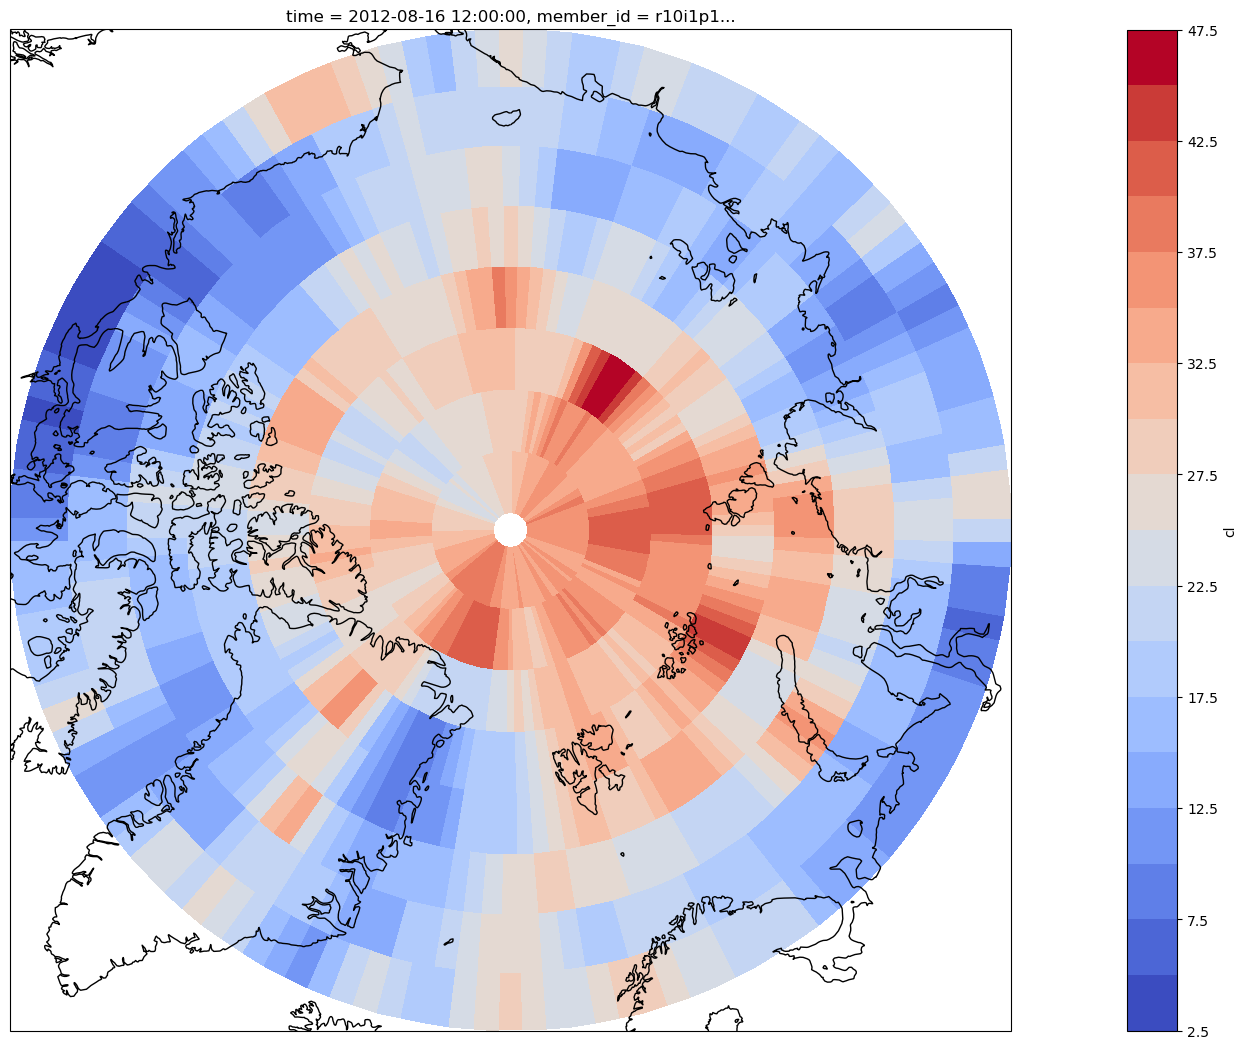

In [116]:
fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test2 = arctic_cl.sel(lev=slice(0.995, 0.65), time = slice('2011-10', '2018'))
ds_test_3 = ds_test2.mean('lev')
ds_test_3.cl.isel(time=10, member_id=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=20);
# plt.title(f'{ds_test2.time.values[0].strftime("%B %d %Y")}, member = {ds_test2.member_id.values[0]}, level = {ds_test2.lev.values[0]}', fontsize=18);


# lev = arctic_cl.sel(lev=slice(0.995, 0.698))
# lev

Text(0.5, 1.0, 'December 16 2014')

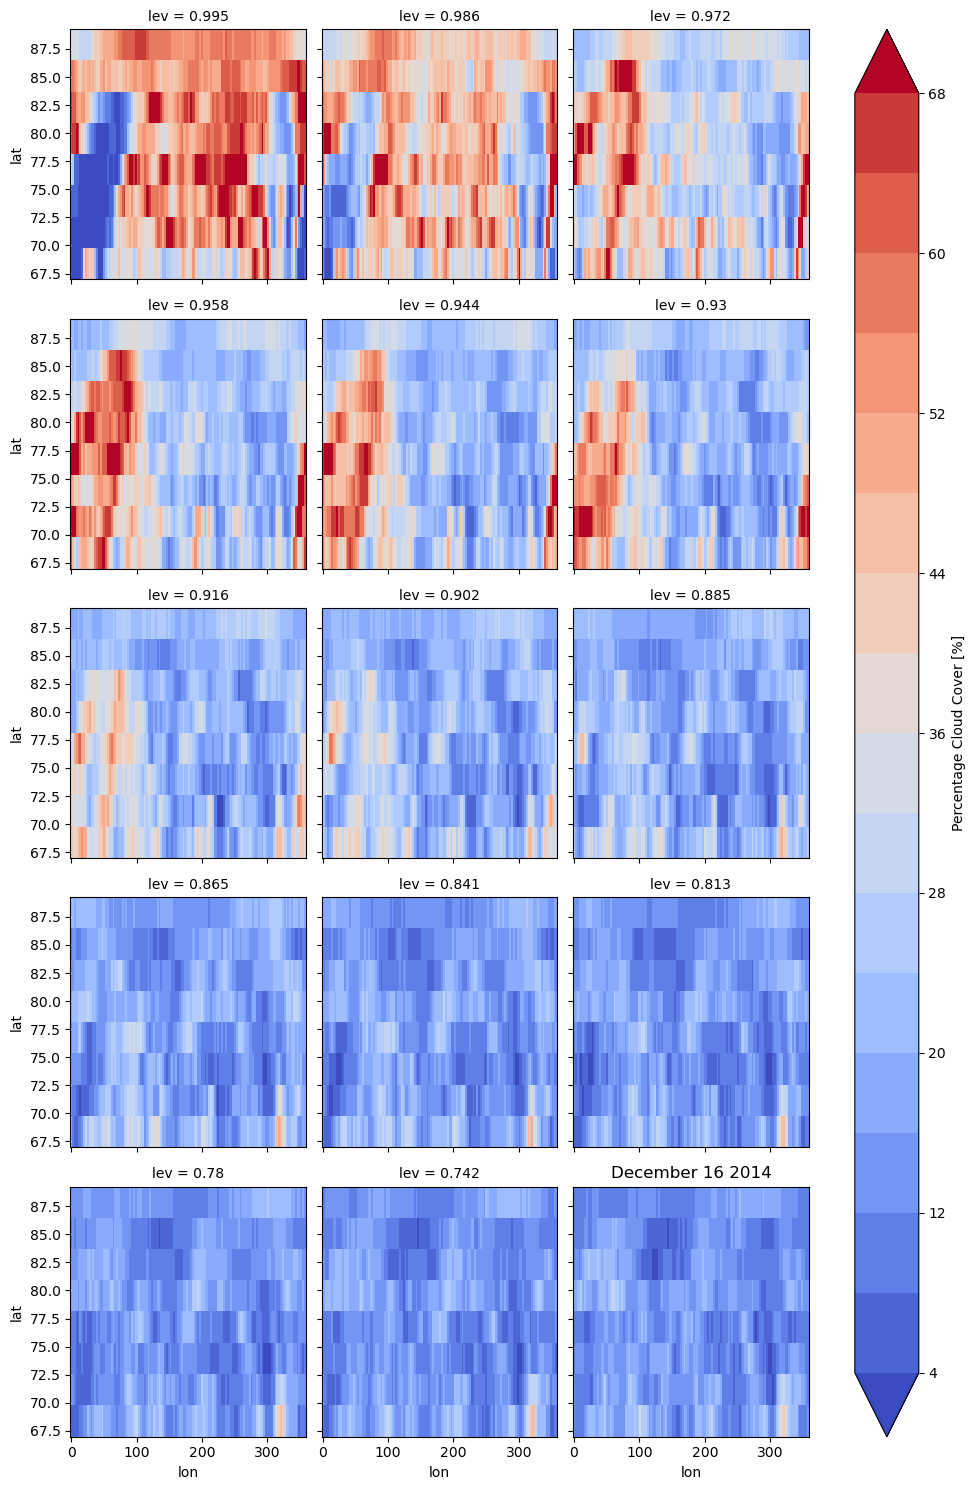

In [68]:
ds_test2.cl.isel(time=38, member_id=0).plot(col="lev", col_wrap=3, robust=True, cmap='coolwarm', levels=20);
plt.title(f'{ds_test2.time.values[38].strftime("%B %d %Y")}')

# Sea surface temperature

In [108]:
### Search for specific datasets
cat_subset_SST = cat.search(
    experiment_id=["ssp585"],
    table_id="Omon",
    variable_id="tos",
    grid_label="gn",
    source_id=["CanESM5"],
    # member_id =["r11i1p1f1"]
)

cat_subset_SST.df

activity_id institution_id source_id experiment_id  member_id table_id  \
0   ScenarioMIP          CCCma   CanESM5        ssp585  r16i1p2f1     Omon   
1   ScenarioMIP          CCCma   CanESM5        ssp585  r16i1p1f1     Omon   
2   ScenarioMIP          CCCma   CanESM5        ssp585  r17i1p1f1     Omon   
3   ScenarioMIP          CCCma   CanESM5        ssp585  r10i1p1f1     Omon   
4   ScenarioMIP          CCCma   CanESM5        ssp585  r13i1p1f1     Omon   
5   ScenarioMIP          CCCma   CanESM5        ssp585  r12i1p2f1     Omon   
6   ScenarioMIP          CCCma   CanESM5        ssp585  r11i1p2f1     Omon   
7   ScenarioMIP          CCCma   CanESM5        ssp585  r11i1p1f1     Omon   
8   ScenarioMIP          CCCma   CanESM5        ssp585  r10i1p2f1     Omon   
9   ScenarioMIP          CCCma   CanESM5        ssp585  r12i1p1f1     Omon   
10  ScenarioMIP          CCCma   CanESM5        ssp585   r8i1p2f1     Omon   
11  ScenarioMIP          CCCma   CanESM5        ssp585   r9i1p1f1     Omon   
12  ScenarioMIP          CCCma   CanESM5        ssp585   r9i1p2f1     Omon   
13  ScenarioMIP          CCCma   CanESM5        ssp585  r21i1p1f1     Omon   
14  ScenarioMIP          CCCma   CanESM5        ssp585  r20i1p2f1     Omon   
15  ScenarioMIP          CCCma   CanESM5        ssp585  r20i1p1f1     Omon   
16  ScenarioMIP          CCCma   CanESM5        ssp585  r14i1p2f1     Omon   
17  ScenarioMIP          CCCma   CanESM5        ssp585  r15i1p1f1     Omon   
18  ScenarioMIP          CCCma   CanESM5        ssp585  r19i1p2f1     Omon   
19  ScenarioMIP          CCCma   CanESM5        ssp585  r22i1p1f1     Omon   
20  ScenarioMIP          CCCma   CanESM5        ssp585  r21i1p2f1     Omon   
21  ScenarioMIP          CCCma   CanESM5        ssp585  r22i1p2f1     Omon   
22  ScenarioMIP          CCCma   CanESM5        ssp585  r17i1p2f1     Omon   
23  ScenarioMIP          CCCma   CanESM5        ssp585  r18i1p2f1     Omon   
24  ScenarioMIP          CCCma   CanESM5        ssp585  r18i1p1f1     Omon   
25  ScenarioMIP          CCCma   CanESM5        ssp585  r13i1p2f1     Omon   
26  ScenarioMIP          CCCma   CanESM5        ssp585  r15i1p2f1     Omon   
27  ScenarioMIP          CCCma   CanESM5        ssp585  r14i1p1f1     Omon   
28  ScenarioMIP          CCCma   CanESM5        ssp585   r1i1p1f1     Omon   
29  ScenarioMIP          CCCma   CanESM5        ssp585   r1i1p2f1     Omon   
30  ScenarioMIP          CCCma   CanESM5        ssp585  r19i1p1f1     Omon   
31  ScenarioMIP          CCCma   CanESM5        ssp585  r24i1p1f1     Omon   
32  ScenarioMIP          CCCma   CanESM5        ssp585  r25i1p1f1     Omon   
33  ScenarioMIP          CCCma   CanESM5        ssp585  r23i1p1f1     Omon   
34  ScenarioMIP          CCCma   CanESM5        ssp585   r6i1p1f1     Omon   
35  ScenarioMIP          CCCma   CanESM5        ssp585  r24i1p2f1     Omon   
36  ScenarioMIP          CCCma   CanESM5        ssp585   r7i1p1f1     Omon   
37  ScenarioMIP          CCCma   CanESM5        ssp585   r6i1p2f1     Omon   
38  ScenarioMIP          CCCma   CanESM5        ssp585   r2i1p2f1     Omon   
39  ScenarioMIP          CCCma   CanESM5        ssp585   r2i1p1f1     Omon   
40  ScenarioMIP          CCCma   CanESM5        ssp585  r25i1p2f1     Omon   
41  ScenarioMIP          CCCma   CanESM5        ssp585   r3i1p1f1     Omon   
42  ScenarioMIP          CCCma   CanESM5        ssp585  r23i1p2f1     Omon   
43  ScenarioMIP          CCCma   CanESM5        ssp585   r3i1p2f1     Omon   
44  ScenarioMIP          CCCma   CanESM5        ssp585   r4i1p2f1     Omon   
45  ScenarioMIP          CCCma   CanESM5        ssp585   r8i1p1f1     Omon   
46  ScenarioMIP          CCCma   CanESM5        ssp585   r7i1p2f1     Omon   
47  ScenarioMIP          CCCma   CanESM5        ssp585   r5i1p2f1     Omon   
48  ScenarioMIP          CCCma   CanESM5        ssp585   r5i1p1f1     Omon   
49  ScenarioMIP          CCCma   CanESM5        ssp585   r4i1p1f1     Omon   

   variable_id grid_label

In [110]:
filename = "arctic_dset_SST_ssp585.nc"
full_path = out_folder / filename
var_key = "ScenarioMIP.CCCma.CanESM5.ssp585.Omon.gn"

write_file = True
if write_file:
    can_subset_SST = cat_subset_SST.search(table_id="Omon", variable_id = "tos", source_id = "CanESM5", experiment_id = 'ssp585')
    dset_dict_SST = can_subset_SST.to_dataset_dict(zarr_kwargs={'consolidated':True})
    SST_dset = dset_dict_SST[var_key]
    arctic_SST_dset = SST_dset.sel(time = slice('2015', '2025'))
    full_path = do_write(arctic_SST_dset,filename,out_folder)
    print(f"got here, writing {full_path=}")

arctic_SST = xr.open_dataset(full_path)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


got here, writing full_path=PosixPath('/Users/jalena/repos/e440/A448/data/arctic_dset_SST_ssp585.nc')


In [165]:
ds_SST = dset_dict_SST["CMIP.CCCma.CanESM5.historical.Omon.gn"]
ds_SST

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1980, bnds: 2, member_id: 65,
                         dcpp_init_year: 1, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
  * member_id           (member_id) object 'r10i1p1f1' ... 'r9i1p2f1'
  * dcpp_init_year      (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (member_id, dcpp_init_year, time, j, i) float32 dask.array<chunksize=(1, 1, 120, 291, 360), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Omon.gn

In [167]:
zstore_SST = cat_subset_SST.df['zstore'][1]

# Mutable-mapping interface for this zstore:
mapper_SST = gcs.get_mapper(zstore_SST)

# open her up:
ds_SST_2 = xr.open_zarr(mapper_SST, consolidated=True)
ds_SST_2

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(215, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          p2-pictrl
    CCCma_pycmor_hash:           7c87dd3a822d55650b3c17cd65db0ca251282530
    CCCma_runid:                 p2-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variable_id:                 tos
    variant_label:               r10i1p2f1
    version:                     v20190429
    status:                      2019-11-11;created;by nhn2@columbia.edu
    netcdf_tracking_ids:         hdl:21.14100/7522d572-b0b1-4dc7-a081-54e5821...
    version_id:                  v20190429

/Users/jalena/opt/miniconda3/envs/e440/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)


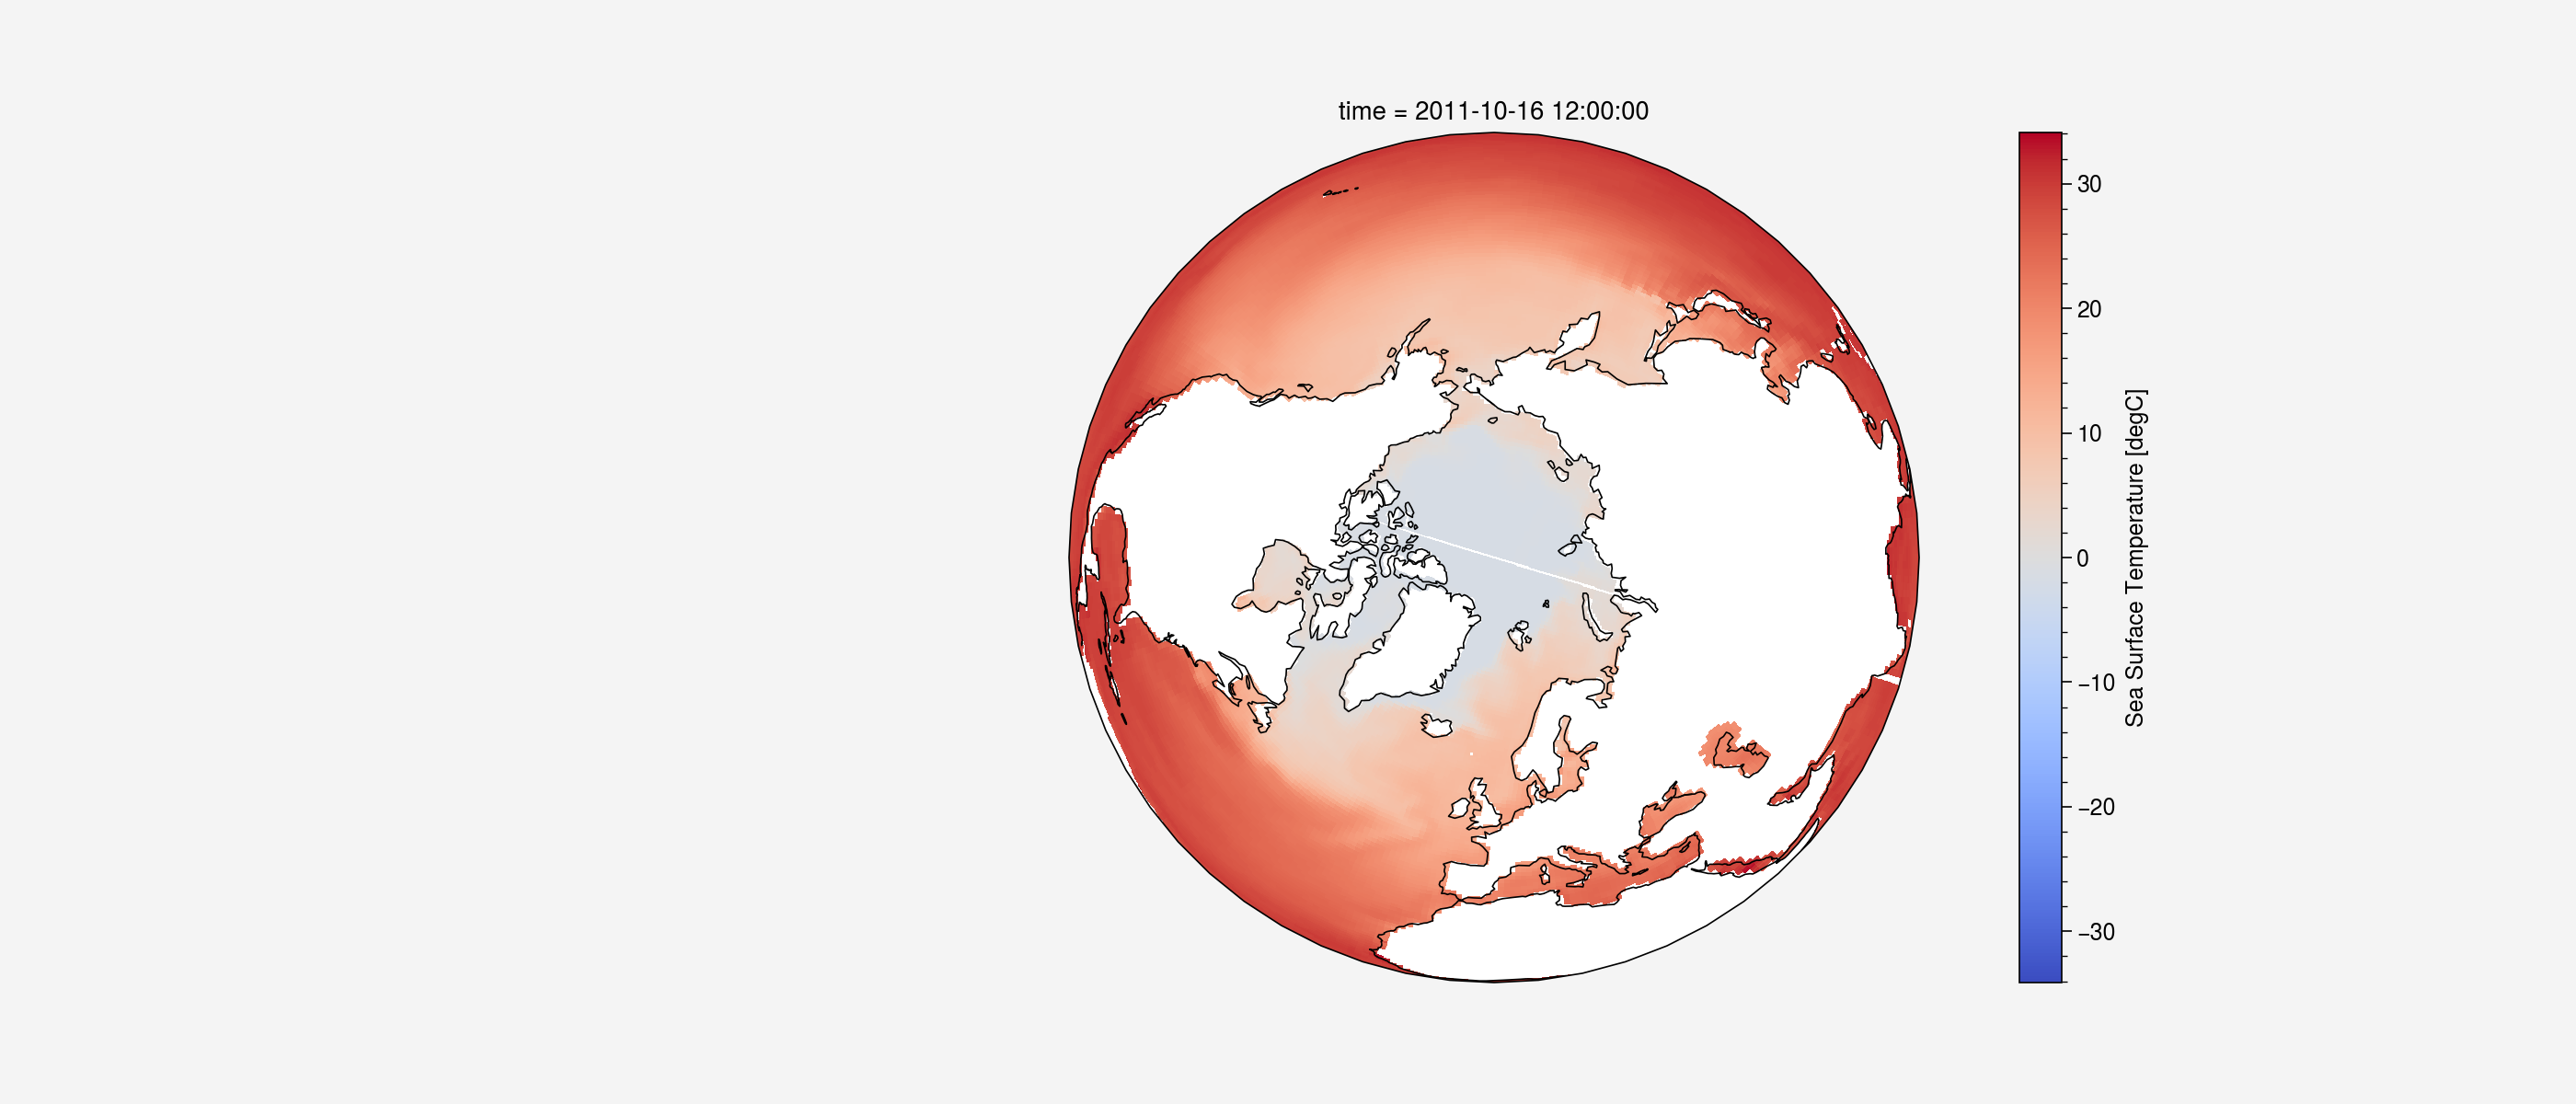

In [174]:
plt.figure(figsize=(14,6))
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ax.set_global()
SST = ds_SST_2.sel(time = slice('2011-10', '2018'))
SST.tos[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True, cmap='coolwarm')

# SSP585

## cloud

In [84]:
arctic_ssp_clt

<xarray.Dataset>
Dimensions:         (lat: 8, lon: 128, time: 12, dcpp_init_year: 1,
                     member_id: 50, bnds: 2)
Coordinates:
  * lat             (lat) float64 68.37 71.16 73.95 76.74 79.53 82.31 85.1 87.86
  * lon             (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * time            (time) object 2015-01-16 12:00:00 ... 2015-12-16 12:00:00
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * member_id       (member_id) object 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
    lat_bnds        (lat, bnds) float64 ...
    lon_bnds        (lon, bnds) float64 ...
    time_bnds       (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn

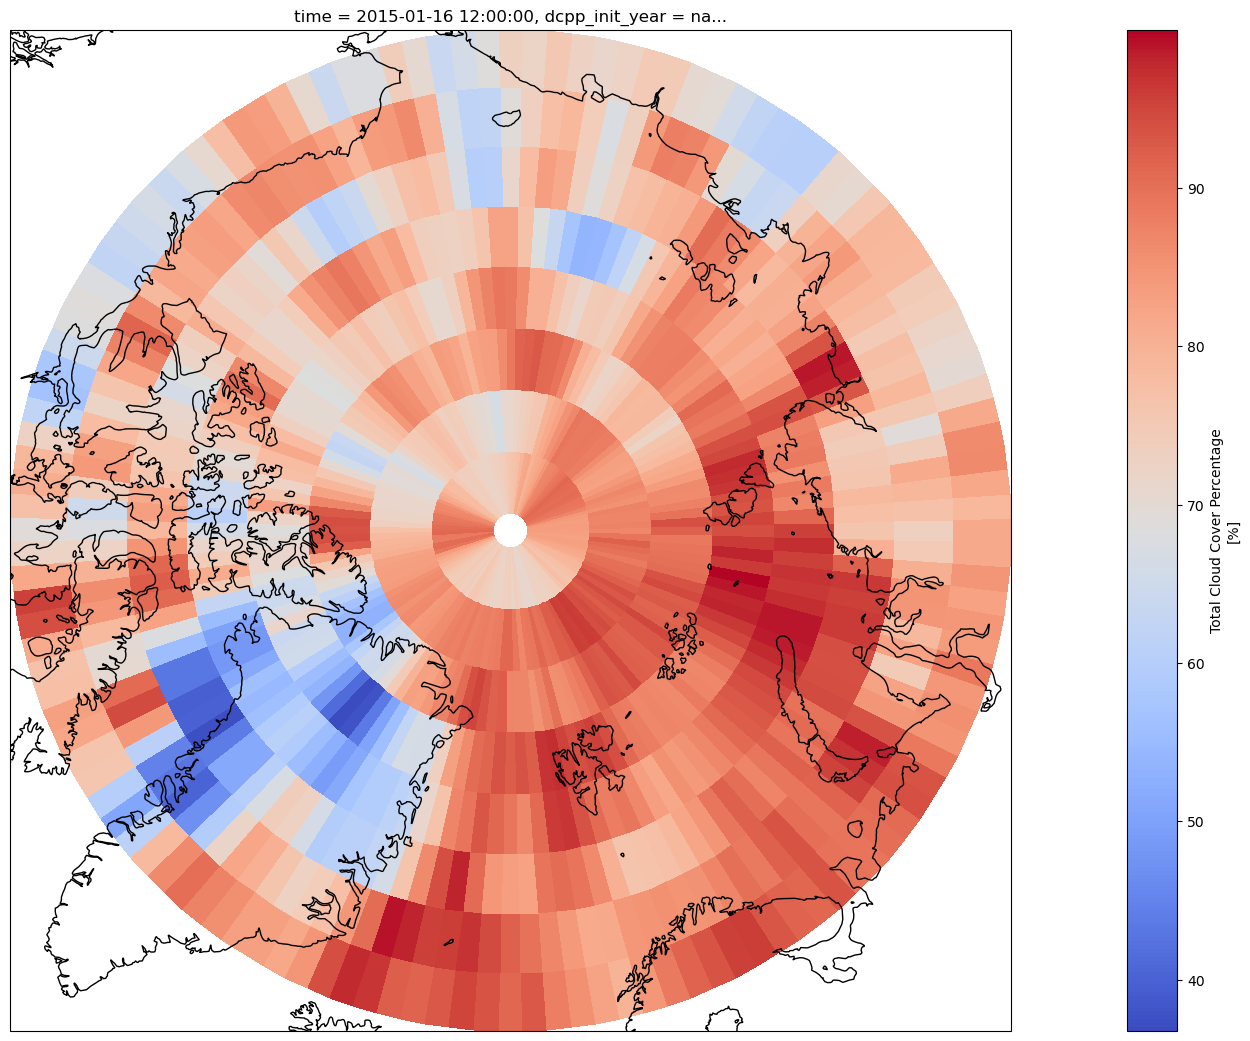

In [85]:
fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test = arctic_ssp_clt.sel(lat = slice(66.33, 90), time = slice('2011-10', '2018'))
ds_test.clt.isel(time=0, member_id=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm');